In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
#importing data
movie_data=pd.read_csv('movies.dat', names=['MovieID','Title','Genres'],sep='::',encoding='ISO-8859-1',engine='python')
ratings_data=pd.read_csv('ratings.dat', names=['UserID','MovieID','Ratings','Timestamp'],sep='::',encoding='ISO-8859-1',engine='python')
users_data=pd.read_csv('users.dat', names=['UserID','Gender','Age','Occupation','Zip'],sep='::',encoding='ISO-8859-1',engine='python')

In [3]:
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [5]:
movie_data.shape

(3883, 3)

In [6]:
movie_data.dtypes

MovieID     int64
Title      object
Genres     object
dtype: object

In [7]:
ratings_data.head()

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
ratings_data.dtypes

UserID       int64
MovieID      int64
Ratings      int64
Timestamp    int64
dtype: object

In [9]:
ratings_data.isnull().sum()

UserID       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

In [10]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
users_data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip           0
dtype: int64

In [12]:
users_data.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip           object
dtype: object

In [13]:
#merging dataframes
user_rating=users_data.merge(ratings_data,how='left',left_on=['UserID'], right_on=['UserID'])
user_rating.head()

,UserID,Gender,Age,Occupation,Zip,MovieID,Ratings,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [14]:
#making Master data
Master_data=user_rating.merge(movie_data,how='left',left_on=['MovieID'],right_on=['MovieID'])
Master_data.head()

,UserID,Gender,Age,Occupation,Zip,MovieID,Ratings,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [15]:
Master_data=Master_data[['UserID','Gender','Age','Occupation','MovieID','Ratings','Title']]
Master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,Title
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,1,F,1,10,661,3,James and the Giant Peach (1996)
2,1,F,1,10,914,3,My Fair Lady (1964)
3,1,F,1,10,3408,4,Erin Brockovich (2000)
4,1,F,1,10,2355,5,"Bug's Life, A (1998)"


<AxesSubplot:xlabel='Age', ylabel='Count'>

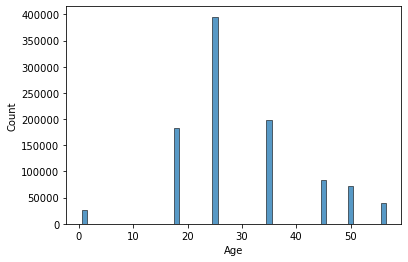

In [16]:
import seaborn as sns
sns.histplot(data=Master_data,x='Age', discrete=True)

<AxesSubplot:title={'center':'User ratings of Toy story'}>

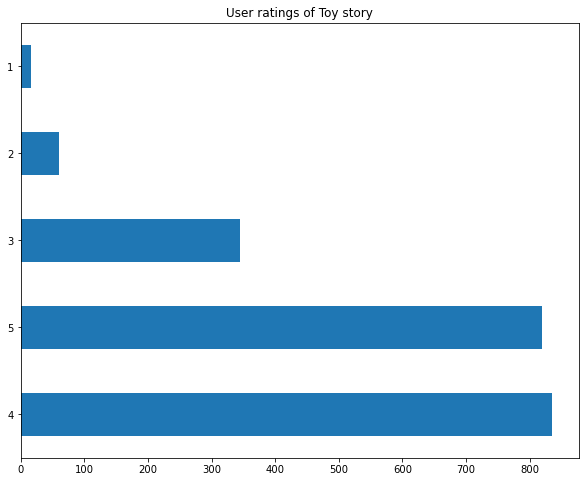

In [17]:
movie_name=Master_data.groupby('Title')
toy_story=movie_name.get_group('Toy Story (1995)')
toy_story['Ratings'].value_counts().plot(kind='barh',figsize=(10,8), title="User ratings of Toy story")

In [18]:
movie_rating=Master_data.groupby('MovieID')
avg_ratings=movie_rating['Ratings'].mean()
TOP_25=avg_ratings.sort_values(ascending=False).head(25)
TOP_25

MovieID
989     5.000000
3881    5.000000
1830    5.000000
3382    5.000000
787     5.000000
3280    5.000000
3607    5.000000
3233    5.000000
3172    5.000000
3656    5.000000
3245    4.800000
53      4.750000
2503    4.666667
2905    4.608696
2019    4.560510
318     4.554558
858     4.524966
745     4.520548
50      4.517106
527     4.510417
1148    4.507937
2309    4.500000
1795    4.500000
2480    4.500000
439     4.500000
Name: Ratings, dtype: float64

In [19]:
pd.merge(TOP_25,movie_data, how='left',left_on='MovieID', right_on='MovieID')

,MovieID,Ratings,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [20]:
#finding user id-2696
user_26= Master_data[ratings_data['UserID']==2696]
user_26

,UserID,Gender,Age,Occupation,MovieID,Ratings,Title
440667,2696,M,25,7,1258,4,"Shining, The (1980)"
440668,2696,M,25,7,1270,2,Back to the Future (1985)
440669,2696,M,25,7,1617,4,L.A. Confidential (1997)
440670,2696,M,25,7,1625,4,"Game, The (1997)"
440671,2696,M,25,7,1644,2,I Know What You Did Last Summer (1997)
440672,2696,M,25,7,1645,4,"Devil's Advocate, The (1997)"
440673,2696,M,25,7,1805,4,Wild Things (1998)
440674,2696,M,25,7,1892,4,"Perfect Murder, A (1998)"
440675,2696,M,25,7,800,5,Lone Star (1996)
440676,2696,M,25,7,2338,2,I Still Know What You Did Last Summer (1998)


In [21]:
#spliting genre into list and find unique values
Master_data['list_genre']=movie_data['Genres'].str.split('|')
Master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,Title,list_genre
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),"[Animation, Children's, Comedy]"
1,1,F,1,10,661,3,James and the Giant Peach (1996),"[Adventure, Children's, Fantasy]"
2,1,F,1,10,914,3,My Fair Lady (1964),"[Comedy, Romance]"
3,1,F,1,10,3408,4,Erin Brockovich (2000),"[Comedy, Drama]"
4,1,F,1,10,2355,5,"Bug's Life, A (1998)",[Comedy]


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

## assign a new series to the genres_list column that contains a list of categories for each movie
list2series = pd.Series(Master_data['list_genre'])
list2series=list2series.dropna()
mlb = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(mlb.fit_transform(list2series),columns=mlb.classes_,index=list2series.index)

In [23]:
one_hot_genres.head(15)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
Master_data.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
MovieID        int64
Ratings        int64
Title         object
list_genre    object
dtype: object

In [25]:
#selecting features 
features_df=Master_data[['Gender','Age', 'Occupation','Ratings','MovieID']]
features_df['Gender'].replace(['F','M'],[0,1], inplace=True)
features_df.dtypes

C:\Users\Naina\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Gender        int64
Age           int64
Occupation    int64
Ratings       int64
MovieID       int64
dtype: object

<AxesSubplot:>

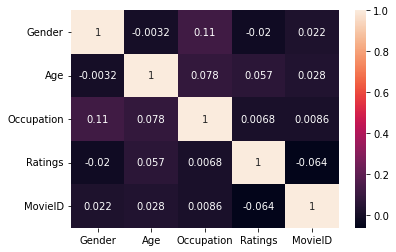

In [26]:
sns.heatmap(features_df.corr(), annot=True)

### With ratings, age is the most correlated variable and least is MovieID

# Prediction model 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
target= features_df[['Ratings']]
features=features_df.drop('Ratings', axis=1)
print(target.shape)
print(features_df.shape)


(1000209, 1)
(1000209, 5)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,target, random_state=0)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750156, 4)
(250053, 4)
(750156, 1)
(250053, 1)


In [36]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)

C:\Users\Naina\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=1000)

In [37]:
from sklearn import metrics
pred=logreg.predict(x_test)


In [38]:
metrics.accuracy_score(y_test,pred)

0.34871407261660525

In [39]:
#standardizing
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1 )
knn.fit(x_train_std,y_train)
pred2=knn.predict(x_test_std)
metrics.accuracy_score(y_test, pred2)

C:\Users\Naina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.3115059607363239